<a href="https://colab.research.google.com/github/cassiamariane/data-science/blob/main/An%C3%A1lise_Clim%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A análise abaixo foi realizada a partir dos dados disponibilizados na formação cientista de dados.

A motivação é interpretar profundamente os dados, encontrando outliers e normalizando o dataset, para que assim uma possível análise seja feita de maneira assertiva.

Critérios:
*   Aparência: sol, nublado, chuva;
*   Temperatura: -135 ~ 130 F;
*   Umidade: 0 ~ 100;
*   Jogar: sim ou nao;
*   Tratamento de valores ausentes.

# Análise Exploratória


In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
from google.colab import files
dataset = pd.read_csv("datasets/tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


<Axes: xlabel='Aparencia'>

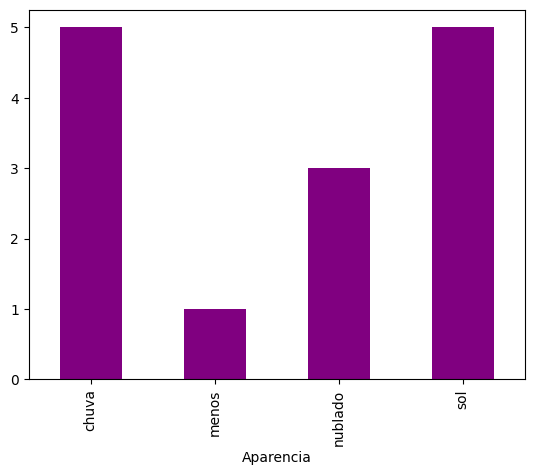

In [ ]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado.plot.bar(color='purple')

In [ ]:
dataset['Aparencia'].mode()

0    chuva
1      sol
Name: Aparencia, dtype: object

<Axes: xlabel='Vento'>

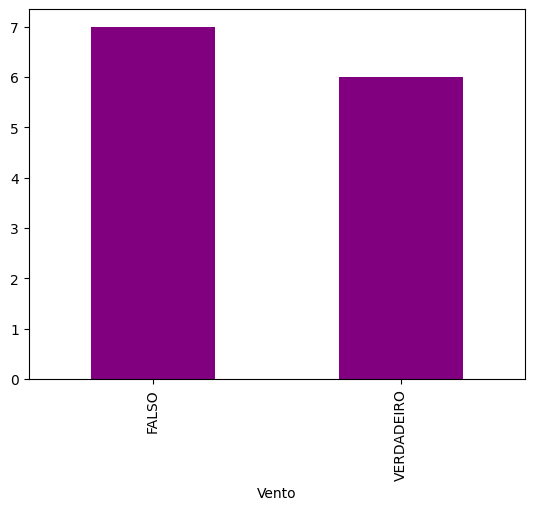

In [ ]:
agrupado = dataset.groupby(['Vento']).size()
agrupado.plot.bar(color='purple')

<Axes: xlabel='Jogar'>

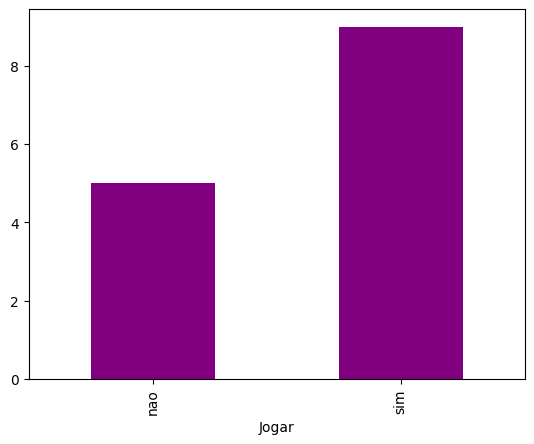

In [ ]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado.plot.bar(color='purple')

In [ ]:
#colunas numéricas
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

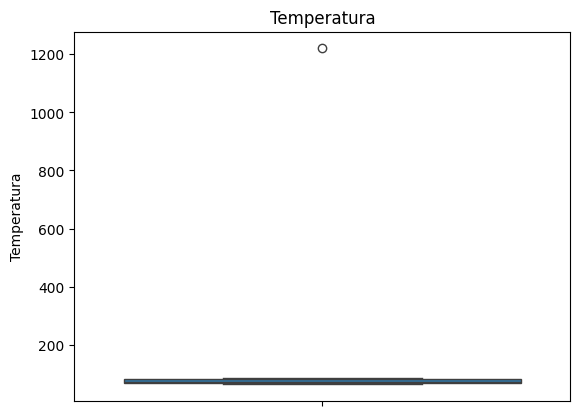

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

<ipython-input-11-e4198bf76582>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

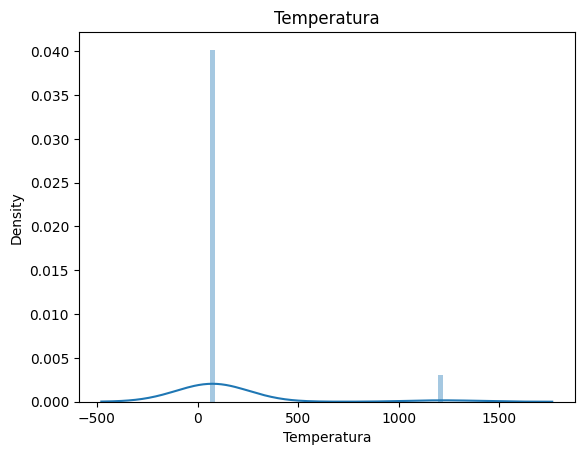

In [ ]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

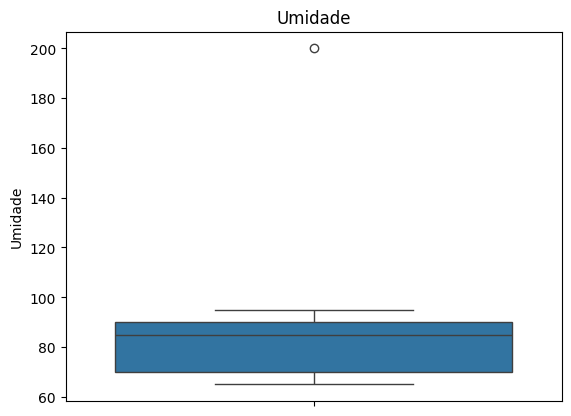

In [ ]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

<ipython-input-14-dadda2ca765d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

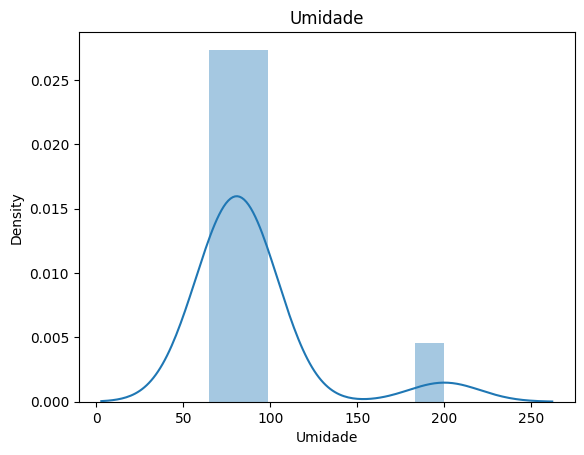

In [ ]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

# Limpeza e Tratamento


In [ ]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "sol" #ou dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "chuva"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [ ]:
#temperatura fora do intervalo
dataset.loc[(dataset['Temperatura'] < -135) |  (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
dataset.loc[(dataset['Temperatura'] <  -135 )  | ( dataset['Temperatura'] >  130) ] = sts.median(dataset['Temperatura'])
dataset.loc[(dataset['Temperatura'] < -135) |  (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset.loc[(dataset['Umidade'] < 0) |  (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
dataset.loc[(dataset['Umidade'] < 0) |  (dataset['Umidade'] > 100)] = sts.median(dataset['Umidade'])
dataset.loc[(dataset['Umidade'] < 0) |  (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset['Umidade'].isnull().sum()

1

In [ ]:
dataset['Umidade'].fillna(sts.median(dataset['Umidade']), inplace=True)

In [ ]:
dataset['Vento'].isnull().sum()

0

In [ ]:
dataset.groupby(dataset['Vento']).size()

Vento
73.5          1
82.5          1
FALSO         6
VERDADEIRO    6
dtype: int64

In [ ]:
#a primeira moda, pois essa coluna tem duas
dataset['Vento'].mode().iloc[0]

'FALSO'

In [ ]:
dataset['Vento'].fillna(dataset['Vento'].mode().iloc[0], inplace=True)

In [ ]:
dataset.loc[(dataset['Vento'] != "FALSO") &  (dataset['Vento'] != "VERDADEIRO")]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,73.5,73.5,73.5,73.5,73.5
9,82.5,82.5,82.5,82.5,82.5


In [ ]:
dataset.loc[(dataset['Vento'] != "FALSO") &  (dataset['Vento'] != "VERDADEIRO")] = dataset['Vento'].mode().iloc[0]
dataset.loc[(dataset['Vento'] != "FALSO") &  (dataset['Vento'] != "VERDADEIRO")]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset.loc[(dataset['Jogar'] != "sim") &  (dataset['Jogar'] != "nao")]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,FALSO,FALSO,FALSO,FALSO,FALSO
9,FALSO,FALSO,FALSO,FALSO,FALSO


In [ ]:
dataset['Jogar'].mode()

0    sim
Name: Jogar, dtype: object

In [ ]:
dataset.loc[(dataset['Jogar'] != "sim") &  (dataset['Jogar'] != "nao")] = dataset['Jogar'].mode().iloc[0]
dataset.loc[(dataset['Jogar'] != "sim") &  (dataset['Jogar'] != "nao")]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64